/tmp/ipykernel_471929/2163541733.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device)
/home/user/miniconda3/envs/rap

Epoch 0: |          | 50/? [00:00<00:00, 58.55it/s, v_num=4]

Epoch 0, global step 50: 'train_loss' reached 7.92083 (best 7.92083), saving model to '/home/user/Área de trabalho/LAGLLAMA/lag-llama1-ZS/lightning_logs/version_4/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:00<00:00, 60.34it/s, v_num=4]

Epoch 1, global step 100: 'train_loss' reached 7.47020 (best 7.47020), saving model to '/home/user/Área de trabalho/LAGLLAMA/lag-llama1-ZS/lightning_logs/version_4/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:00<00:00, 57.93it/s, v_num=4]

Epoch 2, global step 150: 'train_loss' was not in top 1


Epoch 3: |          | 50/? [00:00<00:00, 64.14it/s, v_num=4]

Epoch 3, global step 200: 'train_loss' reached 7.25429 (best 7.25429), saving model to '/home/user/Área de trabalho/LAGLLAMA/lag-llama1-ZS/lightning_logs/version_4/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:00<00:00, 64.64it/s, v_num=4]

Epoch 4, global step 250: 'train_loss' was not in top 1


Epoch 5: |          | 50/? [00:00<00:00, 67.79it/s, v_num=4]

Epoch 5, global step 300: 'train_loss' reached 7.20417 (best 7.20417), saving model to '/home/user/Área de trabalho/LAGLLAMA/lag-llama1-ZS/lightning_logs/version_4/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: |          | 50/? [00:00<00:00, 69.08it/s, v_num=4]

Epoch 6, global step 350: 'train_loss' was not in top 1


Epoch 7: |          | 50/? [00:00<00:00, 58.48it/s, v_num=4]

Epoch 7, global step 400: 'train_loss' was not in top 1


Epoch 8: |          | 50/? [00:00<00:00, 61.99it/s, v_num=4]

Epoch 8, global step 450: 'train_loss' was not in top 1


Epoch 9: |          | 50/? [00:00<00:00, 61.51it/s, v_num=4]

Epoch 9, global step 500: 'train_loss' reached 7.20016 (best 7.20016), saving model to '/home/user/Área de trabalho/LAGLLAMA/lag-llama1-ZS/lightning_logs/version_4/checkpoints/epoch=9-step=500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: |          | 50/? [00:00<00:00, 58.05it/s, v_num=4]


/home/user/miniconda3/envs/rapids_llama_new/lib/python3.9/site-packages/lightning/fabric/utilities/cloud_io.py:56: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ground truth: 100%|██████████

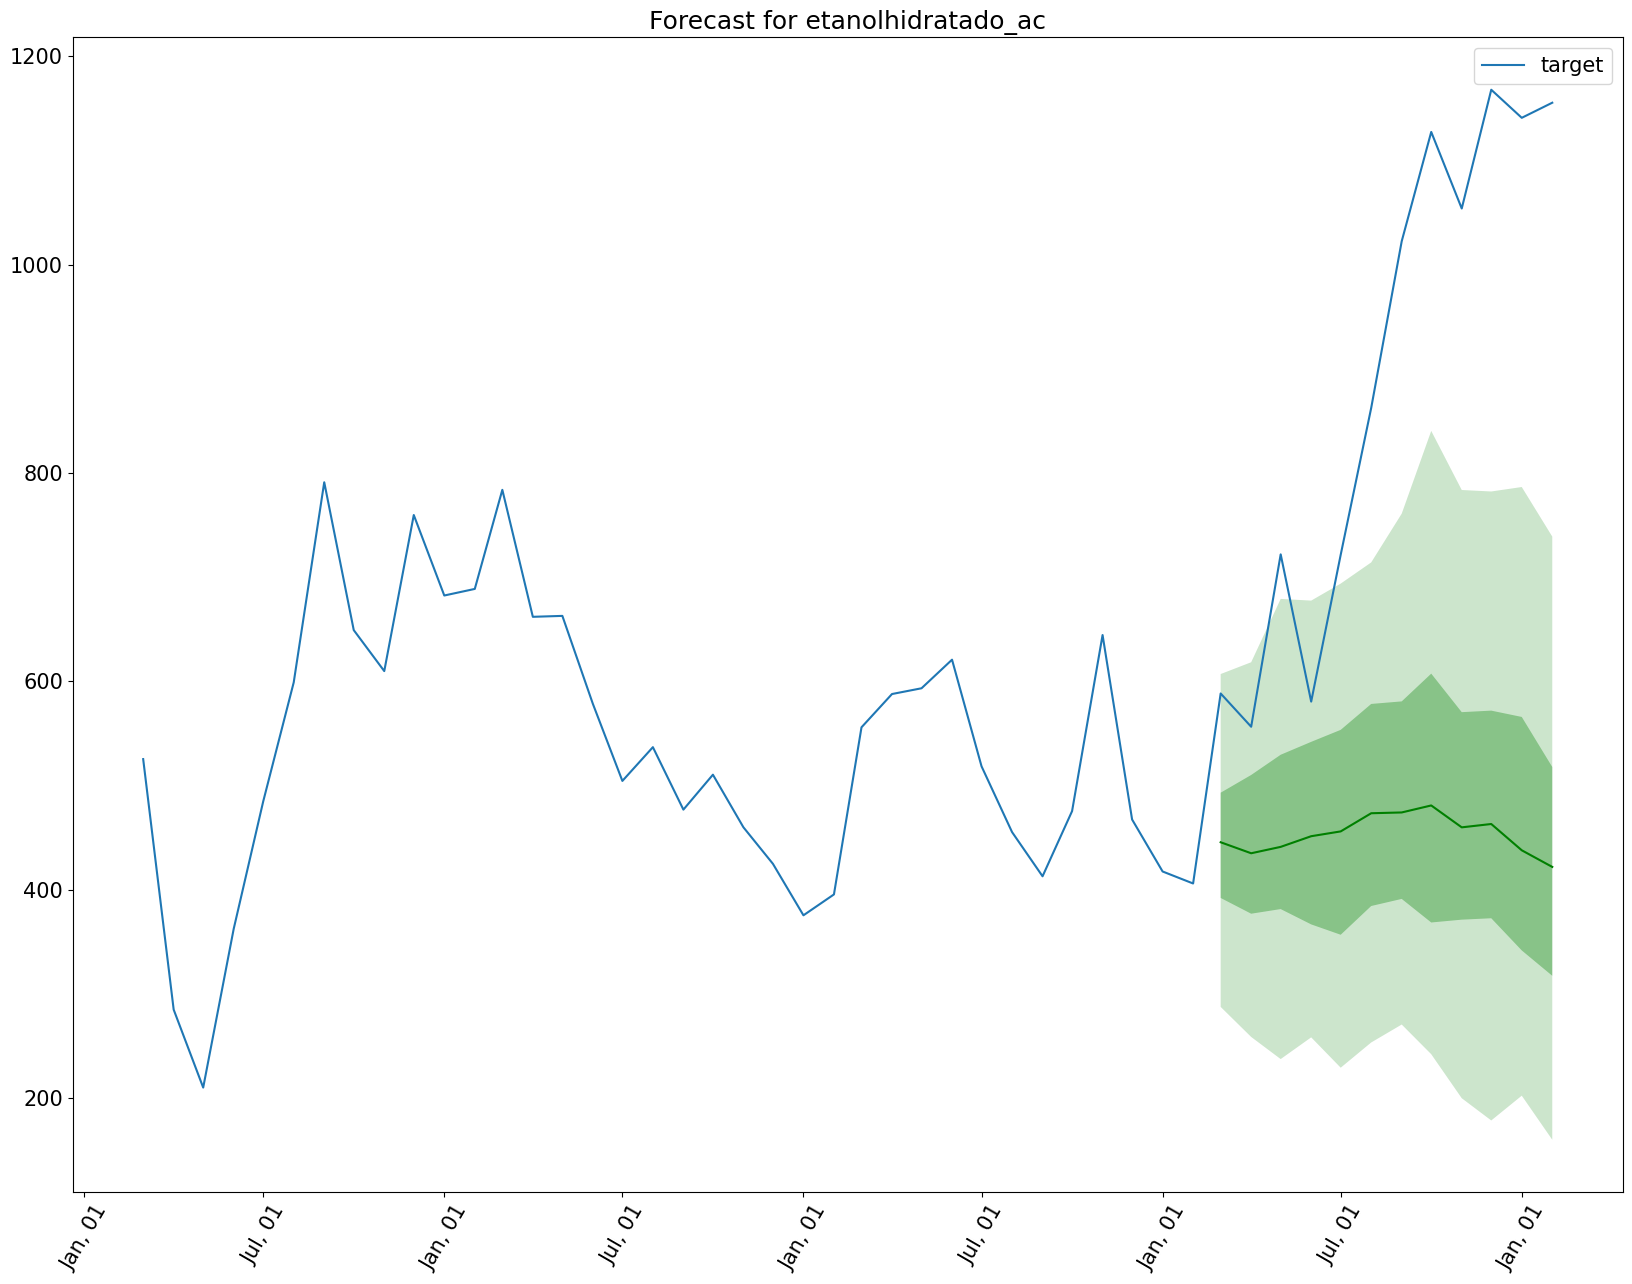

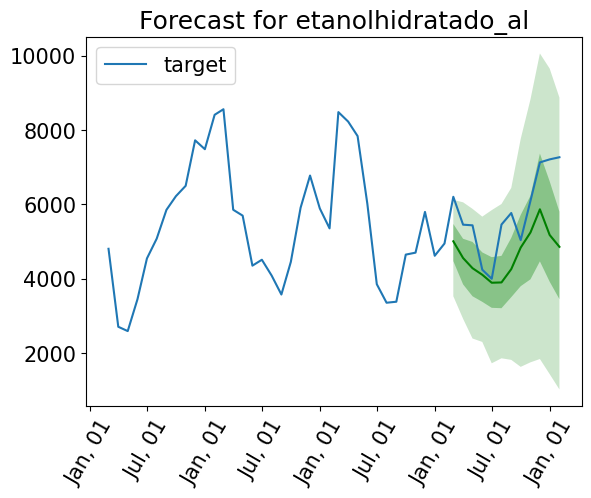

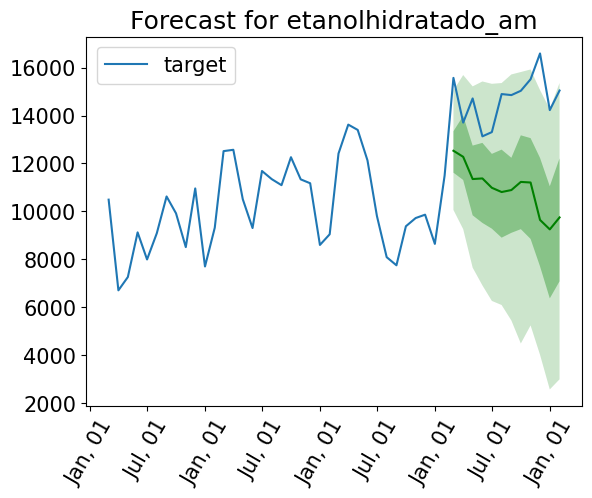

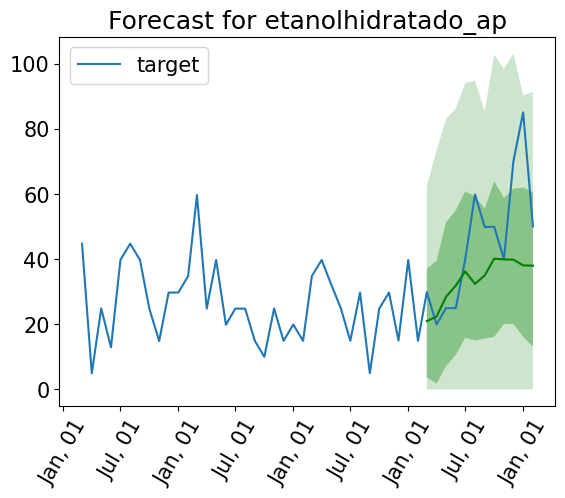

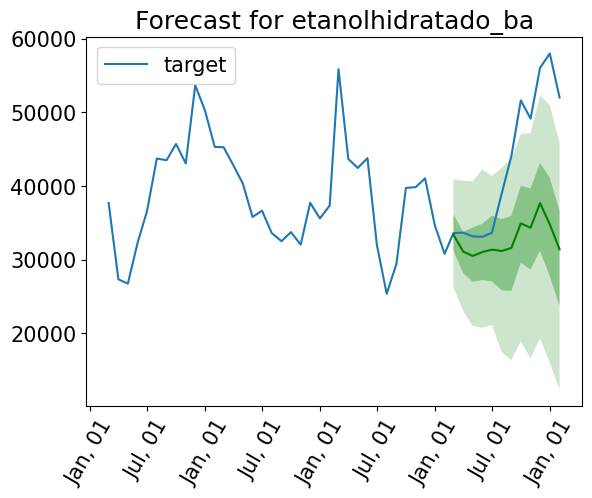

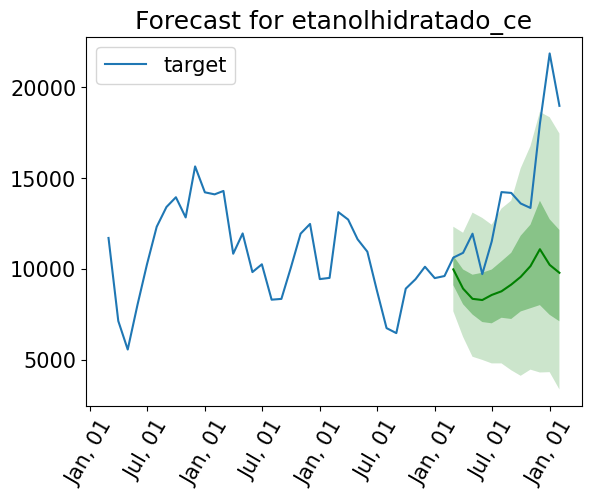

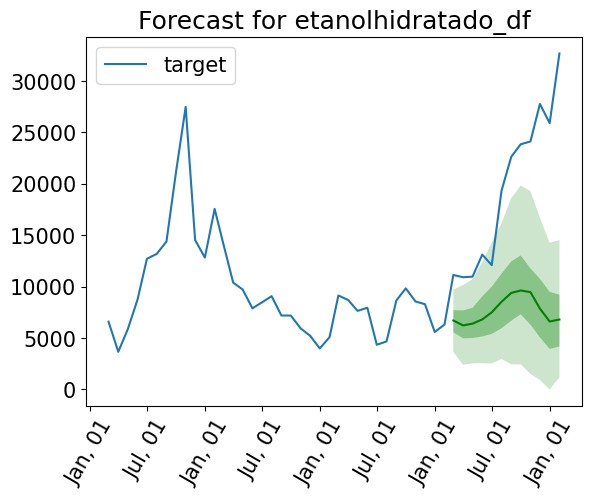

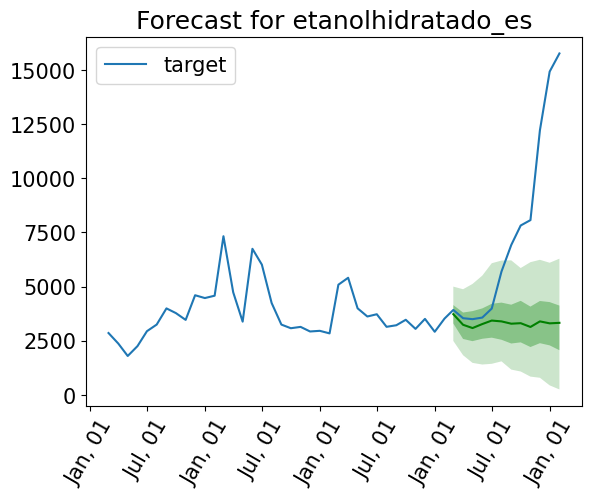

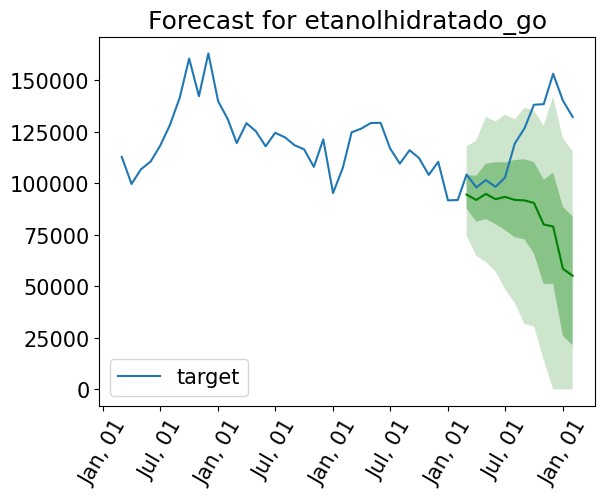

Forecasts successfully saved to forecasts.csv


In [ ]:
########## LagLlama FineTuning GLOBAL #################

import os
import pandas as pd
from itertools import islice
from tqdm.autonotebook import tqdm
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import torch
from gluonts.evaluation import make_evaluation_predictions
from gluonts.dataset.common import ListDataset
from lag_llama.gluon.estimator import LagLlamaEstimator

# Function to read and consolidate all product and state combinations
def consolidate_data(base_path, prediction_length):
    data = []
    products = sorted([name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name))])
    for product in products:
        product_path = os.path.join(base_path, product)
        files = [f for f in os.listdir(product_path) if f.endswith('.csv')]
        for file in files:
            state = extract_estado(file)
            file_path = os.path.join(product_path, file)
            df = pd.read_csv(file_path, header=0, sep=";")
            df = df.iloc[:-prediction_length]
            df['product'] = product
            df['state'] = state
            data.append(df)
    global_data = pd.concat(data, ignore_index=True)
    return global_data

def consolidate_data_test(base_path):
    data = []
    products = sorted([name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name))])
    for product in products:
        product_path = os.path.join(base_path, product)
        files = [f for f in os.listdir(product_path) if f.endswith('.csv')]
        for file in files:
            state = extract_estado(file)
            file_path = os.path.join(product_path, file)
            df = pd.read_csv(file_path, header=0, sep=";")
            df['product'] = product
            df['state'] = state
            data.append(df)
    global_data = pd.concat(data, ignore_index=True)
    return global_data

# Extract state from the filename
def extract_estado(file_name):
    return file_name.split('_')[1]

# Create LagLlama dataset for global training
def prepare_global_dataset(data):
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m')
    data.sort_values(by=['timestamp'], inplace=True)
    dataset = ListDataset(
        [
            {
                "start": group["timestamp"].iloc[0],
                "target": group["m3"].values,
                "item_id": f"{product}_{state}",
            }
            for (product, state), group in data.groupby(["product", "state"])
        ],
        freq="M"
    )
    return dataset

# Train Global LagLlama
def train_global_lagllama(train_dataset, prediction_length, context_length=60, num_samples=350, device="cuda"):
    ckpt = torch.load("lag-llama.ckpt", map_location=device)
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]
    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        nonnegative_pred_samples=True,
        batch_size=60,
        num_parallel_samples=num_samples,
        trainer_kwargs={"max_epochs": 10},
    )
    predictor = estimator.train(train_dataset, cache_data=True)
    return predictor


def evaluate_global_lagllama(predictor, test_dataset, prediction_length):
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=test_dataset,
        predictor=predictor,
        num_samples=250
    )
    forecasts = list(tqdm(forecast_it, total=len(test_dataset), desc="Forecasting"))
    tss = list(tqdm(ts_it, total=len(test_dataset), desc="Ground truth"))
    plt.figure(figsize=(20, 15))
    date_formater = mdates.DateFormatter('%b, %d')
    plt.rcParams.update({'font.size': 15})
    max_plots = min(9, len(forecasts))  
    for idx in range(max_plots):
        forecast = forecasts[idx]
        ts = tss[idx]
        plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target")
        forecast.plot(color='g')
        plt.xticks(rotation=60)
        plt.gca().xaxis.set_major_formatter(date_formater)
        plt.title(f"Forecast for {forecast.item_id}")
        plt.legend()
        plt.show() 
    return forecasts, tss

def save_forecasts_to_csv(forecasts, output_path="forecasts24.csv"):
    forecast_rows = []
    for forecast in forecasts:
        forecast_mean = forecast.samples.mean(axis=0).flatten()
        timestamps = pd.date_range(
            start=forecast.start_date.to_timestamp(),
            periods=len(forecast_mean),
            freq="M"
        )
        forecast_rows.extend(
            [{"item_id": forecast.item_id, "timestamp": timestamp, "forecast": value}
            for timestamp, value in zip(timestamps, forecast_mean)]
        )
    # Convert to DataFrame and save to CSV
    forecast_df = pd.DataFrame(forecast_rows)
    forecast_df.to_csv(output_path, index=False)
    print(f"Forecasts successfully saved to {output_path}")


# Main execution
if __name__ == "__main__":
    base_path = '../uf/'  # Base folder containing product-state data
    prediction_length = 12
    context_length = prediction_length * 5
    global_data = consolidate_data(base_path, prediction_length)
    global_data_test = consolidate_data_test(base_path)
    train_dataset = prepare_global_dataset(global_data)
    device = "cuda" #if torch.cuda.is_available() else "cpu"
    predictor = train_global_lagllama(train_dataset, prediction_length, context_length, device=device)
    test_dataset = prepare_global_dataset(global_data_test)
    output_path = "forecasts.csv"
    forecasts, tss = evaluate_global_lagllama(predictor, test_dataset, prediction_length)
    save_forecasts_to_csv(forecasts, output_path=output_path)

In [6]:
base_path

'../../uf/'

In [5]:
global_data

,timestamp,m3,product,state
0,1990-01-01,63232.764,etanolhidratado,rs
68854,1990-01-01,2421.440,querosenedeaviacao,sc
14328,1990-01-01,7839.388,gasolinac,pb
69252,1990-01-01,95251.155,querosenedeaviacao,sp
13930,1990-01-01,15414.232,gasolinac,ce
...,...,...,...,...
55321,2023-02-01,66642.052,oleodiesel,ro
54923,2023-02-01,34085.039,oleodiesel,rn
54525,2023-02-01,34590.710,oleodiesel,pb
53729,2023-02-01,12975.175,oleocombustivel,mg


In [7]:
train_dataset

[{'start': Period('1990-01', 'M'),
  'target': array([ 860.685  , 1027.991  ,  919.66   ,  823.809  ,  727.958  ,
          966.731  ,  986.084  ,  684.643  ,  975.116  ,  797.041  ,
         1514.678  ,  899.8    ,  833.245  ,  669.432  ,  681.152  ,
          917.791  ,  123.2    ,  806.965  , 1046.187  , 1831.952  ,
          936.653  , 1182.009  ,  105.15   ,  937.201  ,  795.131  ,
          826.867  ,  800.015  ,  968.289  ,  772.552  , 1124.504  ,
          958.363  , 1095.441  ,  782.631  , 1002.472  ,  912.557  ,
          946.269  ,  627.449  ,  735.374  ,  920.288  ,  862.406  ,
          855.613  , 1054.2    ,  806.312  ,  998.309  ,  785.871  ,
          982.34   ,  845.059  ,  983.82   ,  865.531  ,  834.55   ,
          864.917  ,  795.304  ,  885.464  ,  809.91   ,  915.4    ,
         1046.321  , 1221.26   ,  918.12   ,  929.15   ,  960.93   ,
          882.78   ,  767.594  ,  976.58   ,  817.65   ,  409.96   ,
          998.06   ,  893.08   ,  383.53   , 1021.255  ,  